In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv("dataset.csv")

In [3]:
dataset.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
dataset.shape

(11055, 32)

In [5]:
dataset.Result.value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

## her i have replace -1 to 0 
 

## when i try to run xgboost it gave me error so i change result into -1 to 0

## so 1 = Legitimate
   ##   0 = Phishing
    

In [6]:
 dataset[["Result"]]=dataset[["Result"]].replace({-1:0})

In [7]:
dataset[['Result']].value_counts(normalize=True)


Result
1         0.556943
0         0.443057
dtype: float64

## Cheak for null values

In [8]:
dataset.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

##  Unique elements in all the features. 

In [9]:
for col in dataset:
    x= dataset[col].unique()
    print(f"{ col }: unique element :->> {x}")

index: unique element :->> [    1     2     3 ... 11053 11054 11055]
having_IPhaving_IP_Address: unique element :->> [-1  1]
URLURL_Length: unique element :->> [ 1  0 -1]
Shortining_Service: unique element :->> [ 1 -1]
having_At_Symbol: unique element :->> [ 1 -1]
double_slash_redirecting: unique element :->> [-1  1]
Prefix_Suffix: unique element :->> [-1  1]
having_Sub_Domain: unique element :->> [-1  0  1]
SSLfinal_State: unique element :->> [-1  1  0]
Domain_registeration_length: unique element :->> [-1  1]
Favicon: unique element :->> [ 1 -1]
port: unique element :->> [ 1 -1]
HTTPS_token: unique element :->> [-1  1]
Request_URL: unique element :->> [ 1 -1]
URL_of_Anchor: unique element :->> [-1  0  1]
Links_in_tags: unique element :->> [ 1 -1  0]
SFH: unique element :->> [-1  1  0]
Submitting_to_email: unique element :->> [-1  1]
Abnormal_URL: unique element :->> [-1  1]
Redirect: unique element :->> [0 1]
on_mouseover: unique element :->> [ 1 -1]
RightClick: unique element :->> [ 

## Explore the data using histogramand heatmap

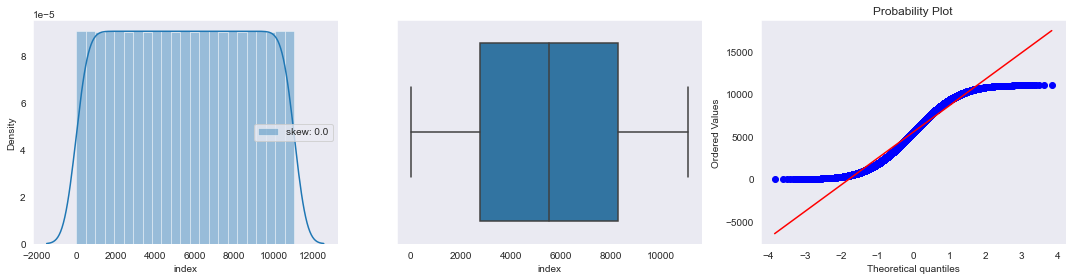

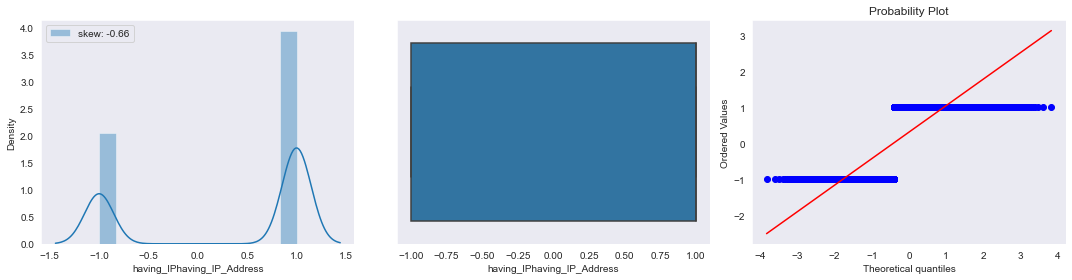

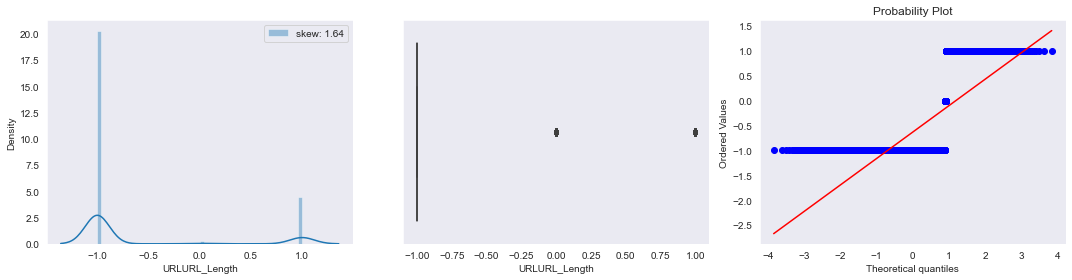

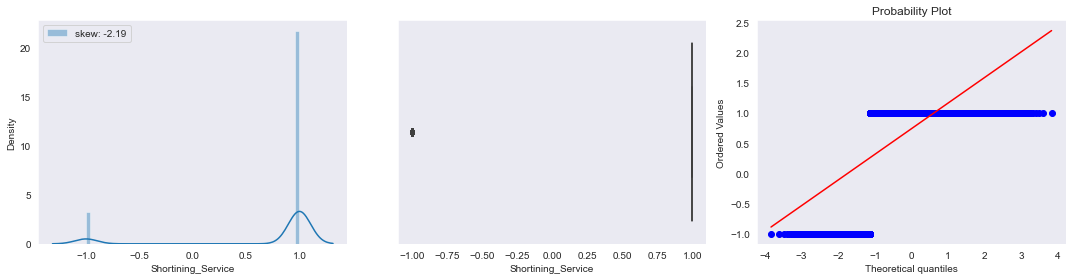

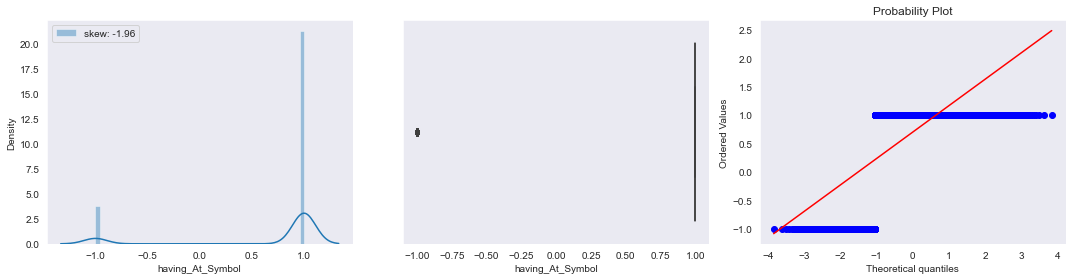

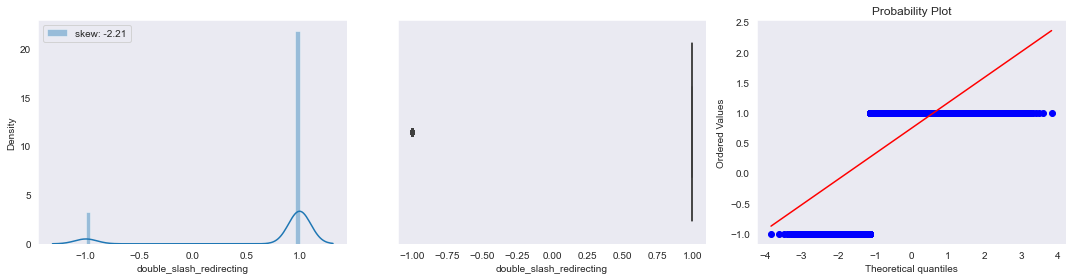

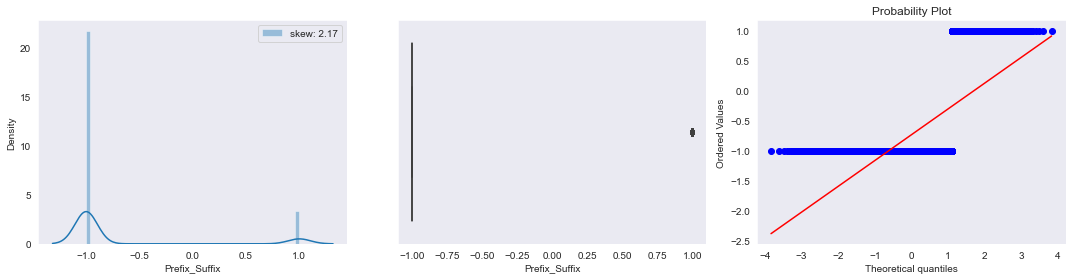

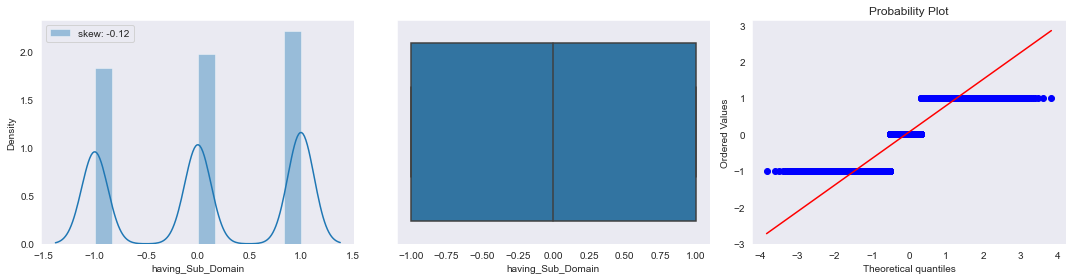

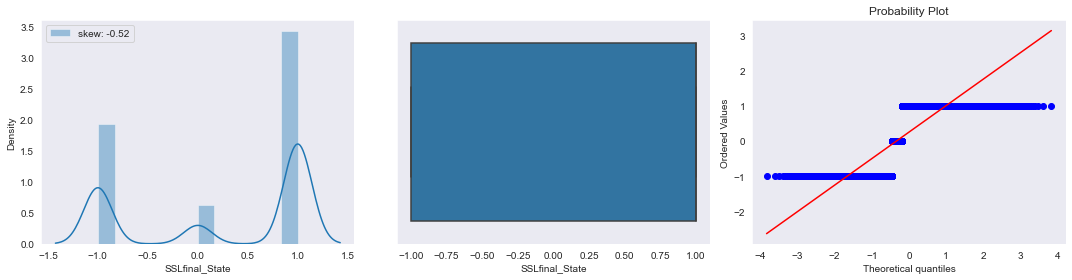

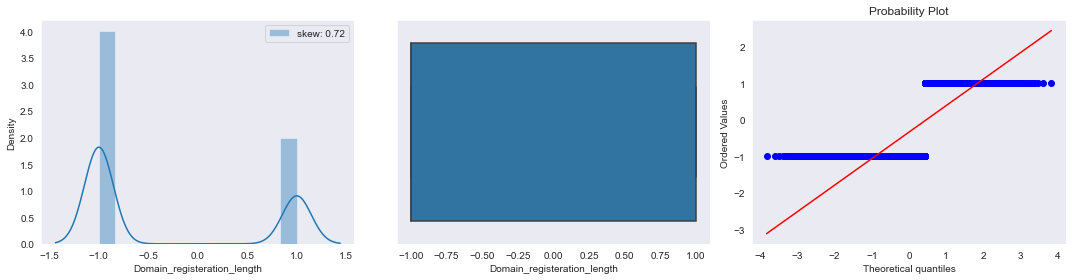

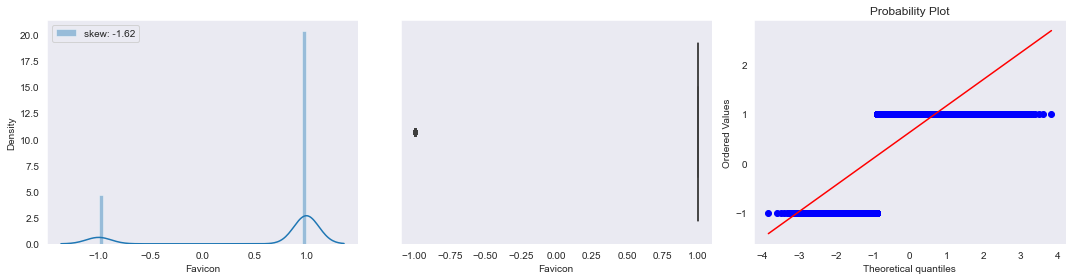

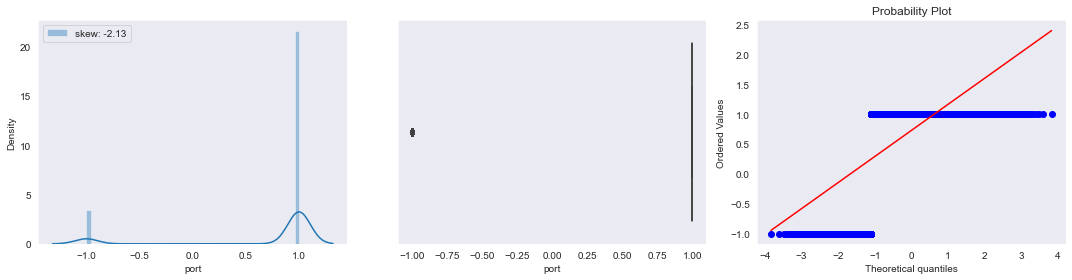

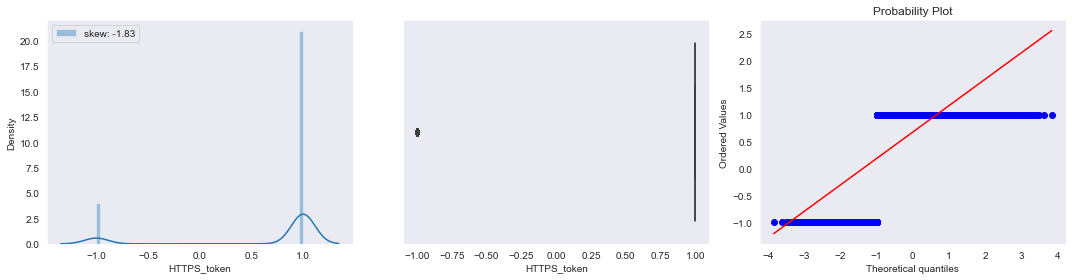

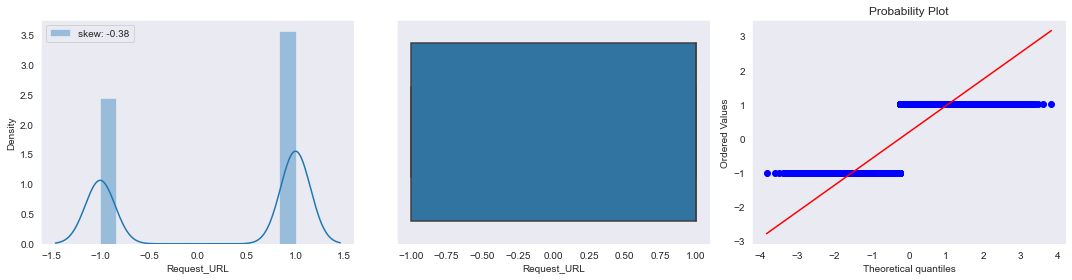

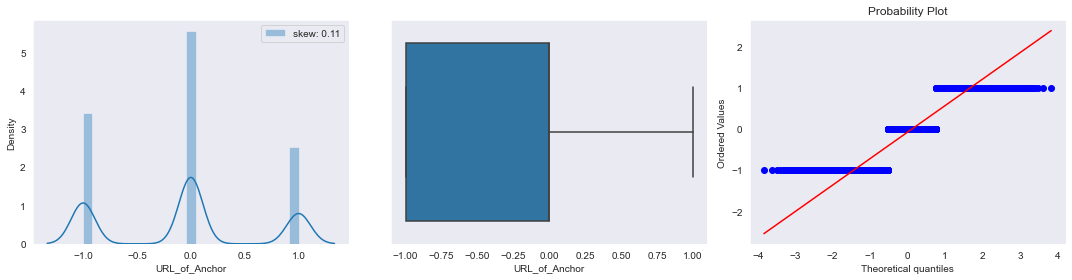

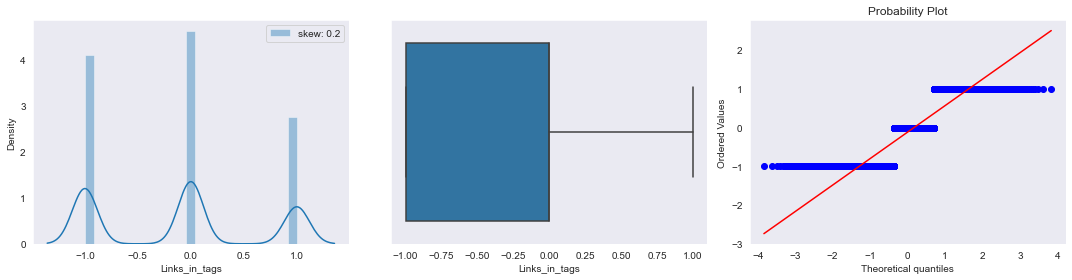

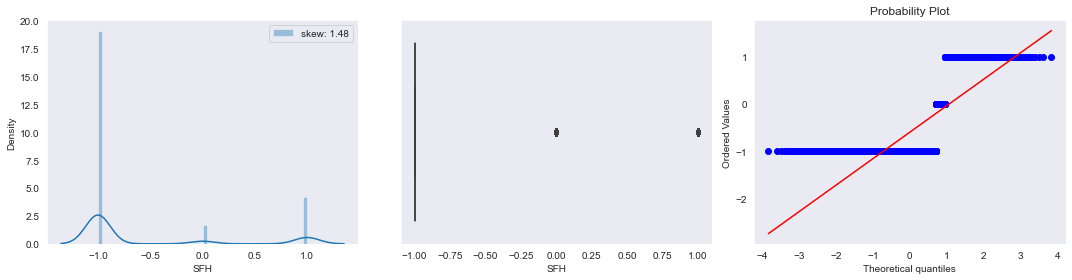

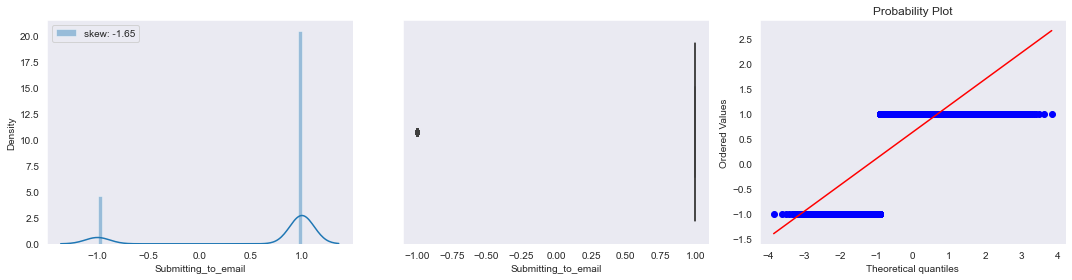

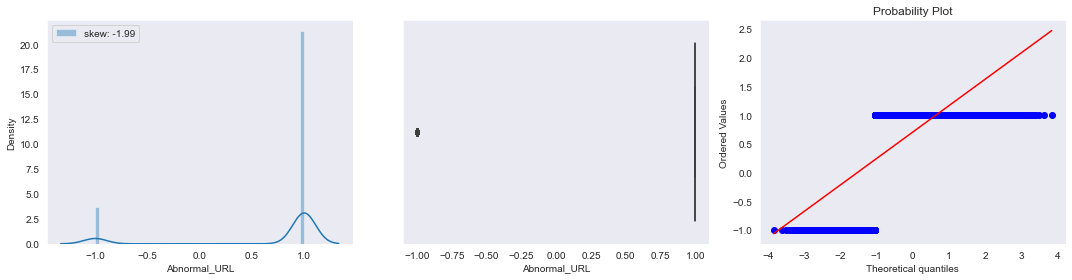

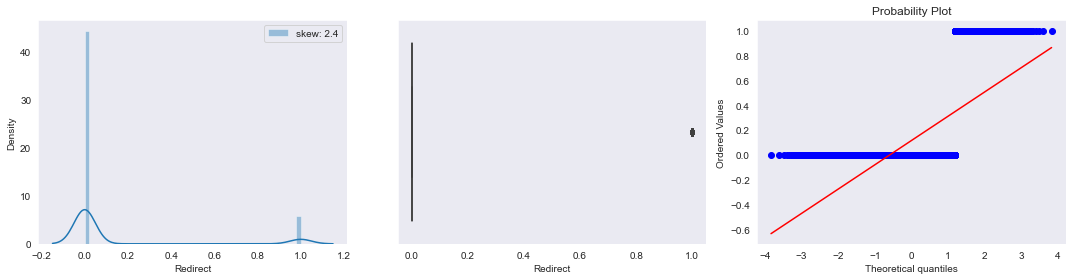

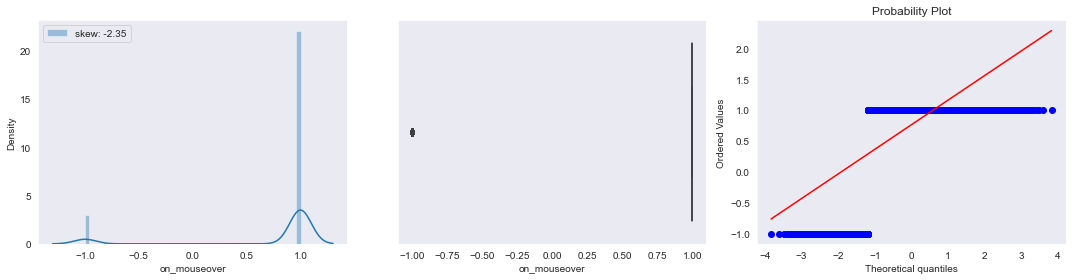

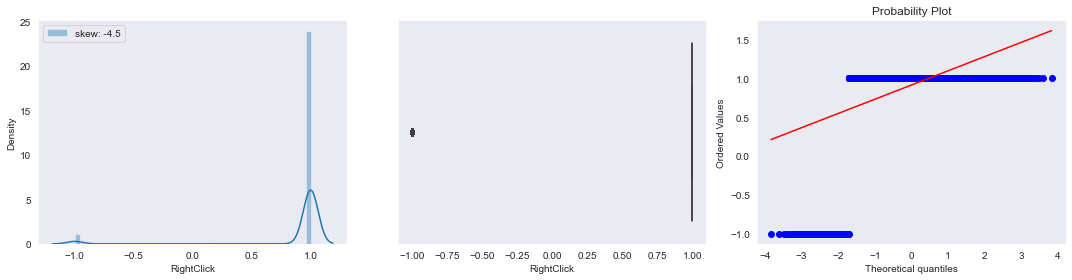

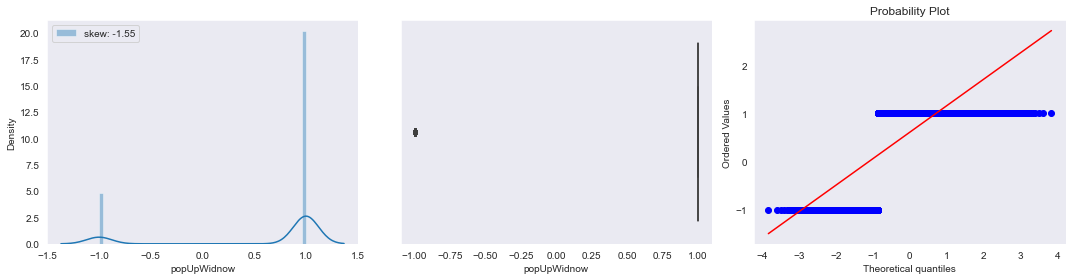

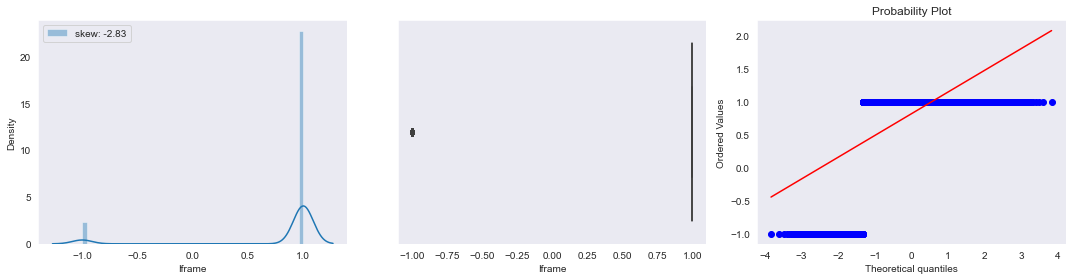

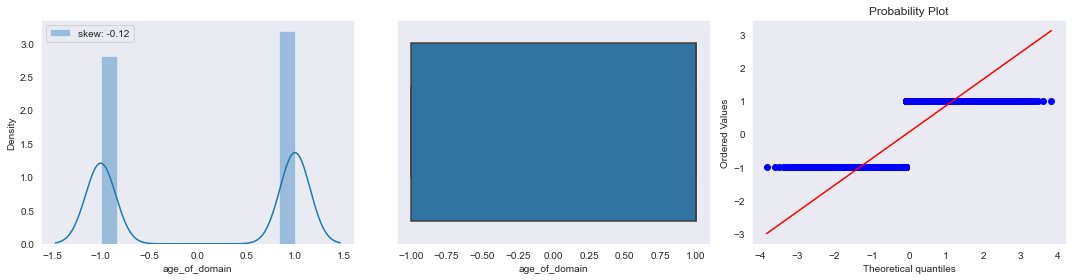

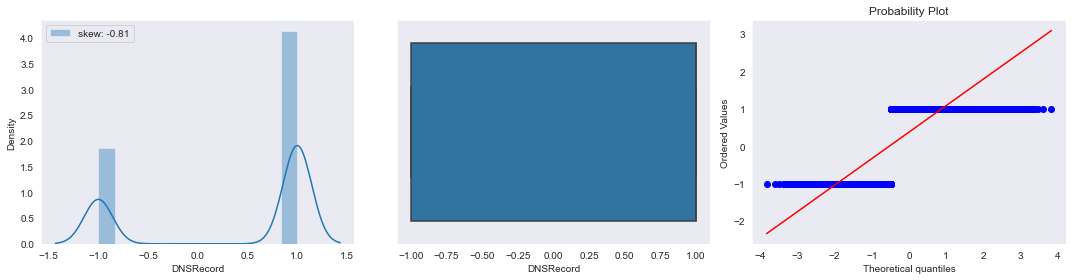

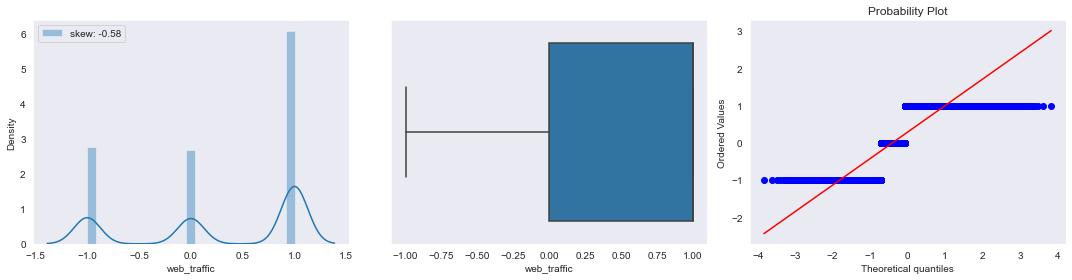

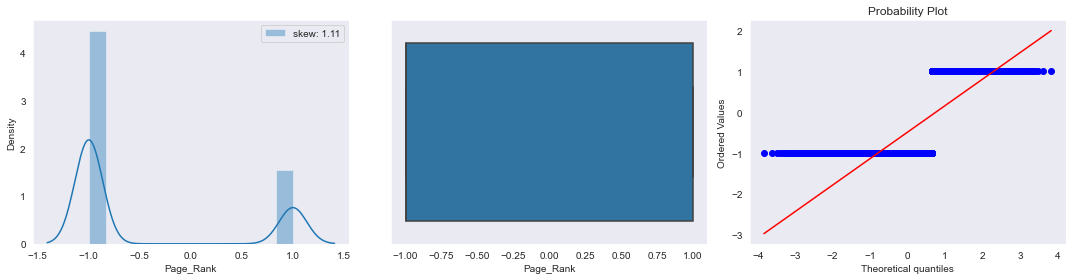

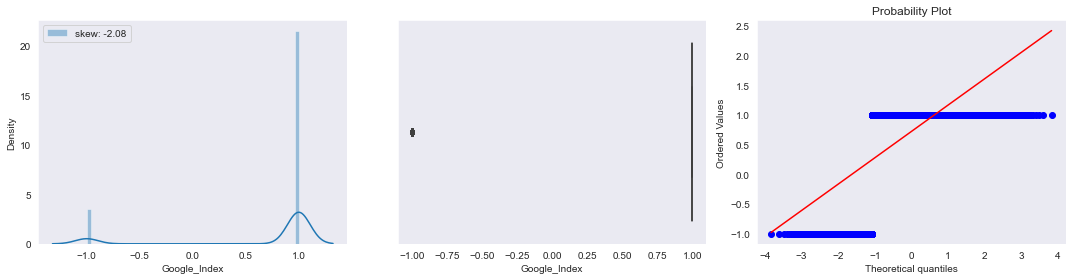

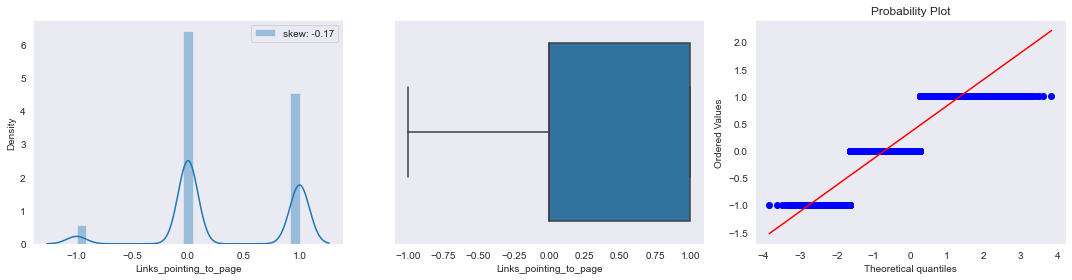

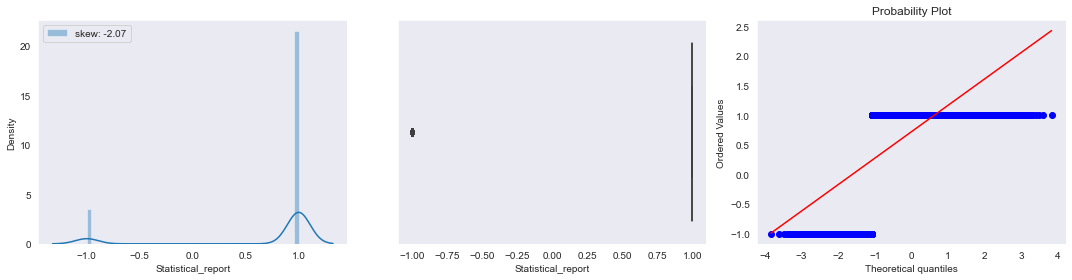

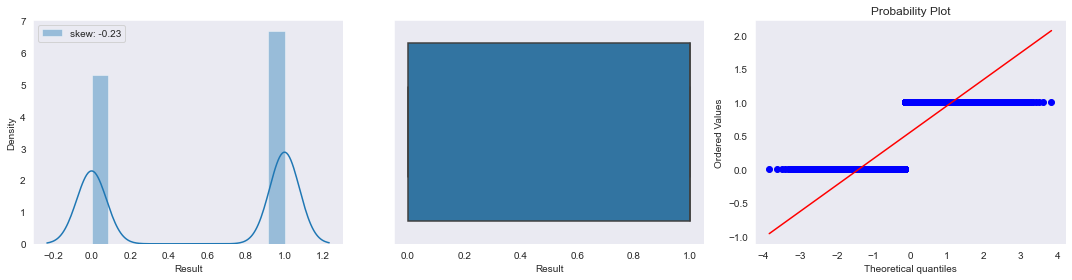

In [10]:
### -------------------------------------------------
import scipy.stats as stats

sns.set_style('dark')
for col in dataset:
    plt.figure(figsize=(15,4))
    plt.subplot(131)
    sns.distplot(dataset[col], label="skew: " + str(np.round(dataset[col].skew(),2)))
    plt.legend()
    plt.subplot(132)
    sns.boxplot(dataset[col])
    plt.subplot(133)
    stats.probplot(dataset[col], plot=plt)
    plt.tight_layout()
    plt.show()

In [11]:
dataset.corr()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
index,1.000000,-0.388317,0.006105,-0.006281,-0.169478,-0.003363,-0.007340,0.234091,-0.006682,-0.001180,...,0.006515,0.002533,0.115320,0.400890,-0.014900,0.065117,-0.012527,0.002442,0.163799,0.000978
having_IPhaving_IP_Address,-0.388317,1.000000,-0.052411,0.403461,0.158699,0.397389,-0.005257,-0.080745,0.071414,-0.022739,...,0.096882,0.054694,-0.010446,-0.050733,0.002922,-0.091774,0.029153,-0.339065,-0.019103,0.094160
URLURL_Length,0.006105,-0.052411,1.000000,-0.097881,-0.075108,-0.081247,0.055247,0.003997,0.048754,-0.221892,...,-0.049381,-0.013838,0.179426,-0.040823,0.008993,0.183518,0.002902,-0.022987,-0.067153,0.057430
Shortining_Service,-0.006281,0.403461,-0.097881,1.000000,0.104447,0.842796,-0.080471,-0.041916,-0.061426,0.060923,...,0.036616,0.016581,-0.052596,0.436064,-0.047074,0.014591,0.155844,-0.198410,0.085461,-0.067966
having_At_Symbol,-0.169478,0.158699,-0.075108,0.104447,1.000000,0.086960,-0.011726,-0.058976,0.031220,0.015522,...,0.290893,0.284410,-0.005499,-0.047872,0.032918,-0.064735,0.037061,-0.006080,-0.080357,0.052948
double_slash_redirecting,-0.003363,0.397389,-0.081247,0.842796,0.086960,1.000000,-0.085590,-0.043079,-0.036200,0.047464,...,0.054463,0.010459,-0.050107,0.431409,-0.062369,-0.003132,0.178415,-0.194165,0.070390,-0.038608
Prefix_Suffix,-0.007340,-0.005257,0.055247,-0.080471,-0.011726,-0.085590,1.000000,0.087891,0.261391,-0.096799,...,-0.014733,-0.036904,0.074116,-0.016556,0.110598,-0.006834,0.067781,0.067423,-0.002763,0.348606
having_Sub_Domain,0.234091,-0.080745,0.003997,-0.041916,-0.058976,-0.043079,0.087891,1.000000,0.267649,-0.082839,...,-0.025312,0.010637,0.119254,0.125493,-0.005764,0.120730,0.057673,-0.010526,0.081627,0.298323
SSLfinal_State,-0.006682,0.071414,0.048754,-0.061426,0.031220,-0.036200,0.261391,0.267649,1.000000,-0.193622,...,-0.013005,-0.002773,0.162809,0.050972,0.258768,0.074545,0.096051,-0.011710,0.063411,0.714741
Domain_registeration_length,-0.001180,-0.022739,-0.221892,0.060923,0.015522,0.047464,-0.096799,-0.082839,-0.193622,1.000000,...,0.051410,0.004393,-0.062851,-0.010477,-0.134454,-0.059898,-0.039766,0.122672,-0.002212,-0.225789


<AxesSubplot:>

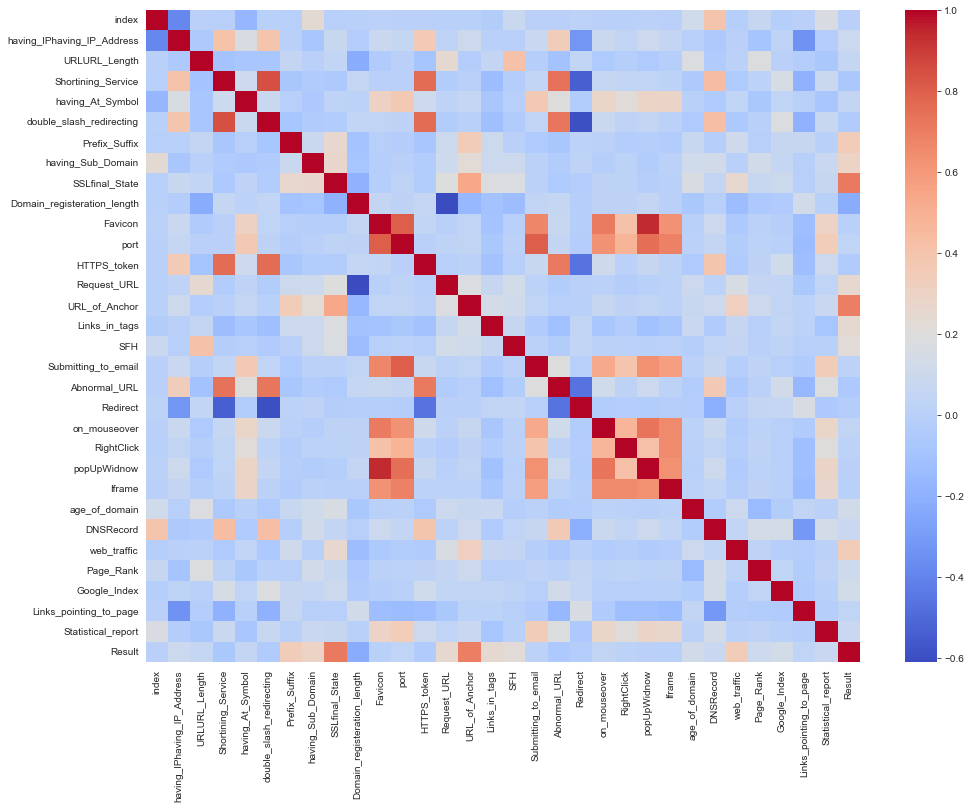

In [12]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(dataset.corr(),cmap="coolwarm")

## chi-square test

In [13]:
dataset.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [14]:
tab = pd.crosstab(dataset['popUpWidnow'],dataset['Favicon'])

In [15]:
tab

Favicon,-1,1
popUpWidnow,,
-1,1992,145
1,61,8857


In [16]:
from scipy.stats import chi2_contingency

'''
Ho: popUpWidnow is independent of Favicon
ha: popUpWidnow is Favicon dependent -> Multicollinearity
'''
tab = pd.crosstab(dataset['popUpWidnow'],dataset['Favicon'])

stat, p_value, dof, expected = chi2_contingency(tab)

print('p-value of chi-square test is :', p_value)

print('---------------------------------------------------------')

if p_value <= 0.05:
    print("Reject Ho, popUpWidnow is Favicon dependent -> Multicollinearity")
else:
    print("Fail to Reject Ho (Accept Ho),  popUpWidnow is independent of Favicon")



p-value of chi-square test is : 0.0
---------------------------------------------------------
Reject Ho, popUpWidnow is Favicon dependent -> Multicollinearity


## From this chi-square test i found, popUpWidnow and Favicon has Multicollinearity. And i used PCA to deal with it.

In [17]:
dataset.columns

Index(['index', 'having_IPhaving_IP_Address', 'URLURL_Length',
       'Shortining_Service', 'having_At_Symbol', 'double_slash_redirecting',
       'Prefix_Suffix', 'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain', 'DNSRecord',
       'web_traffic', 'Page_Rank', 'Google_Index', 'Links_pointing_to_page',
       'Statistical_report', 'Result'],
      dtype='object')

In [18]:
X = dataset.iloc[:,1:-1]
y = dataset[["Result"]]

In [19]:
X.head(5)

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [20]:
y.head(5)

,Result
0,0
1,0
2,0
3,0
4,1


## Train test split

In [21]:
# need to 'random' split data in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 100)

# 80% in train
# 20% data in test

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8844, 30)
(2211, 30)
(8844, 1)
(2211, 1)


## SMOTE

## Here 1=55% and 0=44% no need to use smote but it gives bit better accuracy so here i use it.

In [23]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

SS = SMOTE(sampling_strategy="minority",random_state=100)
X_train_res, y_train_res =SS.fit_resample(X_train,y_train)

In [24]:
print(X_train_res.shape)
print(y_train_res.shape)

(9890, 30)
(9890, 1)


<AxesSubplot:xlabel='Result'>

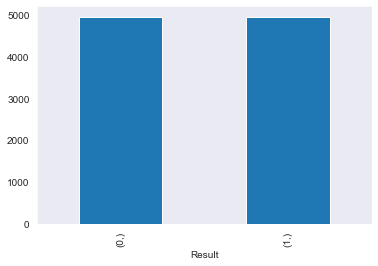

In [25]:
# after smote
(pd.DataFrame(y_train_res)).value_counts().plot(kind='bar')

## PCA

In [26]:
from sklearn.decomposition import PCA
sklearn_pca=PCA(n_components=0.99)
sklearn_pca.fit(X_train_res)
X_train_transform = sklearn_pca.transform(X_train_res)

In [27]:
X_test_transform = sklearn_pca.transform(X_test)

In [28]:
pd.DataFrame(X_train_transform)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,1.170919,3.998646,1.653863,1.376760,0.051888,2.013428,0.289615,0.316099,0.157210,-0.902368,...,-0.840629,-0.152809,-0.623390,-1.005070,0.023824,-0.374640,0.018039,0.175265,0.096302,-0.085503
1,-0.735487,0.795003,-0.398561,0.053912,-0.063872,-1.059930,-1.789553,0.949652,-0.403506,-0.078474,...,-0.697923,-0.005559,0.367764,-0.177116,0.151379,-0.187643,-0.045741,-0.082900,0.039768,-0.021457
2,-0.570998,0.130598,0.873924,1.987005,-0.627324,0.629708,-0.191397,1.440366,-0.218481,0.657340,...,-1.239322,0.077837,0.543318,0.181869,0.878116,-0.403146,1.420589,0.313067,-0.058457,0.024492
3,1.009932,1.743695,3.763917,1.362279,0.994742,1.729236,0.186470,0.984097,0.988471,-0.179970,...,0.023186,-0.029280,-0.374604,0.147137,-0.232080,-0.035511,-0.108254,0.052258,-0.213732,0.018490
4,0.548501,1.581736,2.943517,1.544938,1.596087,-0.282739,-0.219705,1.683444,0.778562,0.191655,...,-0.908684,0.121995,-0.190960,0.041346,-0.924012,0.070663,-0.138898,-0.088723,-0.007764,-0.031276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9885,-1.256256,0.213162,-1.008682,-0.017400,-0.557423,0.946600,-0.710522,-0.765475,-0.352500,0.267327,...,0.268098,0.075558,-0.027725,0.282976,-0.176871,0.055393,-0.009479,-0.067070,-0.048326,0.007355
9886,-0.809820,-1.101292,1.431438,-1.546820,0.973015,-0.431896,0.928436,-1.211136,0.449400,0.188004,...,0.033700,0.051741,-0.319329,-0.015644,-0.105057,-0.241031,-0.000534,-0.052399,-0.045449,0.020846
9887,-0.740294,-0.037585,0.718020,-2.023724,-0.238504,-0.487163,0.554179,1.610285,-0.008624,-0.490223,...,-0.478223,-0.131960,0.170246,0.036724,0.151744,-0.227771,0.133059,-0.054266,-0.011764,0.018706
9888,-1.182195,-2.100081,1.840897,-0.086008,-1.007643,0.878038,1.169499,0.135131,1.437955,-0.404562,...,-0.309075,-0.115545,-0.262667,-0.343631,0.482676,-0.038940,-0.137726,0.195015,-0.043357,-0.039748


## Logreg

In [29]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression()

LogReg.fit(X_train_transform, y_train_res) # training

LogisticRegression()

## Result on test 

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, RocCurveDisplay

In [31]:
# test data result(classification)


pred_test = LogReg.predict(X_test_transform)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 1 ... 1 1 1]
--------------- Confusion Matrix -------------------
[[ 916   83]
 [  92 1120]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       999
           1       0.93      0.92      0.93      1212

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



## Result on train

In [32]:
# train data result(classification)


pred_train = LogReg.predict(X_train_transform)
print("--------------- Prediction on Train data -------------------")
print(pred_train)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_train_res, pred_train))
print("--------------- Classification Report -------------------")
print(classification_report(y_train_res, pred_train))

--------------- Prediction on Train data -------------------
[1 1 1 ... 0 0 0]
--------------- Confusion Matrix -------------------
[[4540  405]
 [ 315 4630]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4945
           1       0.92      0.94      0.93      4945

    accuracy                           0.93      9890
   macro avg       0.93      0.93      0.93      9890
weighted avg       0.93      0.93      0.93      9890



## DecisionTre

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree_mdl=DecisionTreeClassifier()
tree_mdl.fit(X_train_transform, y_train_res)

DecisionTreeClassifier()

## Result on test

In [34]:
# test data result(classification)


pred_test = tree_mdl.predict(X_test_transform)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 1 ... 1 0 1]
--------------- Confusion Matrix -------------------
[[ 938   61]
 [  73 1139]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       999
           1       0.95      0.94      0.94      1212

    accuracy                           0.94      2211
   macro avg       0.94      0.94      0.94      2211
weighted avg       0.94      0.94      0.94      2211



## Random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_transform, y_train_res)

RandomForestClassifier()

In [36]:
# test data result(classification)


pred_test = rf.predict(X_test_transform)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 1 ... 1 0 1]
--------------- Confusion Matrix -------------------
[[ 959   40]
 [  37 1175]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       999
           1       0.97      0.97      0.97      1212

    accuracy                           0.97      2211
   macro avg       0.96      0.96      0.96      2211
weighted avg       0.97      0.97      0.97      2211



## xgboost

In [37]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train_transform, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [38]:
# test data result(classification)


pred_test = xgb.predict(X_test_transform)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 1 ... 1 0 1]
--------------- Confusion Matrix -------------------
[[ 967   32]
 [  34 1178]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       999
           1       0.97      0.97      0.97      1212

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



## AdaBoost

In [39]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
ada.fit(X_train_transform, y_train_res)

AdaBoostClassifier()

In [40]:
# test data result(classification)


pred_test = ada.predict(X_test_transform)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 1 ... 1 0 1]
--------------- Confusion Matrix -------------------
[[ 915   84]
 [  84 1128]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       999
           1       0.93      0.93      0.93      1212

    accuracy                           0.92      2211
   macro avg       0.92      0.92      0.92      2211
weighted avg       0.92      0.92      0.92      2211



## Hyperperameter tuning on Xgboost 

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
param_grid={
    'n_estimators':[50,100,200],
    'max_depth':[3,4,5,6],
    'learning_rate':[0.1,0.2,0.3,0.4]
}

In [43]:
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid, n_jobs=-1)
grid_search.fit(X_train_transform, y_train_res)

GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.300000012, max_bin=256,
                                     max_cat_to_onehot=4, max_delta_step=0,
                                     max_depth=6, max_leaves=0,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n

In [44]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [45]:
from xgboost import XGBClassifier
xgb_hyper=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1)
xgb_hyper.fit(X_train_transform, y_train_res)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.4, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

## test on data

In [46]:
# test data result(classification)


pred_test = xgb_hyper.predict(X_test_transform)
print("--------------- Prediction on Test data -------------------")
print(pred_test)
print("--------------- Confusion Matrix -------------------")
print(confusion_matrix(y_test, pred_test))
print("--------------- Classification Report -------------------")
print(classification_report(y_test, pred_test))

--------------- Prediction on Test data -------------------
[0 1 1 ... 1 0 1]
--------------- Confusion Matrix -------------------
[[ 965   34]
 [  36 1176]]
--------------- Classification Report -------------------
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       999
           1       0.97      0.97      0.97      1212

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



## ROC curve on train data

In [66]:
prob_train = xgb_hyper.predict_proba(X_train_transform)

In [67]:
prob_train

array([[2.6702881e-05, 9.9997330e-01],
       [2.0605326e-04, 9.9979395e-01],
       [5.2729249e-02, 9.4727075e-01],
       ...,
       [9.9270743e-01, 7.2925426e-03],
       [9.9997997e-01, 2.0021600e-05],
       [9.9983752e-01, 1.6246927e-04]], dtype=float32)

In [68]:
prob_train = prob_train[:,1]
print(prob_train)

[9.9997330e-01 9.9979395e-01 9.4727075e-01 ... 7.2925426e-03 2.0021600e-05
 1.6246927e-04]


In [103]:
fpr, tpr, thresholds =  roc_curve(y_train_res, prob_train, pos_label=1)

In [104]:
print('False Positive Rate :', fpr)
print("--------------- ------------------ -------------------")
print('True Positive Rate :', tpr)
print("--------------- ------------------ -------------------")
print('Threshold value :', thresholds)

False Positive Rate : [0.         0.         0.         ... 0.9991911  0.99979778 1.        ]
--------------- ------------------ -------------------
True Positive Rate : [0.00000000e+00 6.06673407e-04 5.05561173e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
--------------- ------------------ -------------------
Threshold value : [1.9999999e+00 9.9999988e-01 9.9999976e-01 ... 4.4911735e-07 4.0192526e-07
 3.6606676e-07]


In [105]:
from sklearn import metrics

In [106]:
AUC = metrics.auc(fpr, tpr)
print('AUC value is : ', AUC)

AUC value is :  0.999766327478911


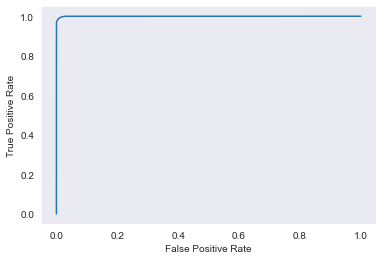

In [107]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## ROC CURVE on test data

In [108]:
prob_test = xgb_hyper.predict_proba(X_test_transform)

In [109]:
prob_test = prob_test[:,1]
print(prob_test)

[6.6152250e-04 9.9995220e-01 9.9381578e-01 ... 9.9974483e-01 3.9652057e-02
 9.9977249e-01]


In [110]:
fpr1, tpr1, thresholds =  roc_curve(y_test, prob_test, pos_label=1)

In [111]:
print('False Positive Rate :', fpr)
print("--------------- ------------------ -------------------")
print('True Positive Rate :', tpr)
print("--------------- ------------------ -------------------")
print('Threshold value :', thresholds)

False Positive Rate : [0.         0.         0.         ... 0.9991911  0.99979778 1.        ]
--------------- ------------------ -------------------
True Positive Rate : [0.00000000e+00 6.06673407e-04 5.05561173e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]
--------------- ------------------ -------------------
Threshold value : [1.99999976e+00 9.99999762e-01 9.99999642e-01 9.99999523e-01
 9.99999285e-01 9.99998927e-01 9.99998808e-01 9.99998689e-01
 9.99998569e-01 9.99998450e-01 9.99998093e-01 9.99997973e-01
 9.99997854e-01 9.99997735e-01 9.99997616e-01 9.99997497e-01
 9.99997258e-01 9.99997020e-01 9.99996781e-01 9.99996662e-01
 9.99996424e-01 9.99996305e-01 9.99996066e-01 9.99995947e-01
 9.99995708e-01 9.99995589e-01 9.99995351e-01 9.99993443e-01
 9.99993205e-01 9.99992847e-01 9.99992728e-01 9.99992490e-01
 9.99992251e-01 9.99992013e-01 9.99991894e-01 9.99991775e-01
 9.99990940e-01 9.99990821e-01 9.99988675e-01 9.99988556e-01
 9.99986410e-01 9.99986053e-01 9.99985337e-01 9.99

In [112]:
AUC = metrics.auc(fpr, tpr)
print('AUC value is : ', AUC)

AUC value is :  0.999766327478911


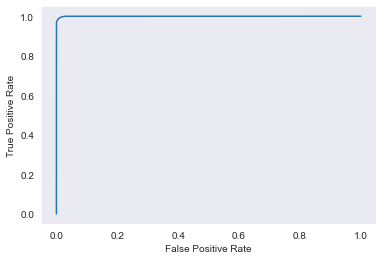

In [113]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## K-Fold cross-validation

In [114]:
from sklearn.model_selection import cross_val_score

In [115]:
score = cross_val_score(xgb_hyper, X, y, cv = 5)

In [116]:
score.mean()

0.967345092718227

In [117]:
var = score.std()*2
print(var)

0.034375490913472286


In [118]:
print('mean accuracy of xgb_hyper model is : ', score.mean())
print('varaince :', score.std()*2)

mean accuracy of xgb_hyper model is :  0.967345092718227
varaince : 0.034375490913472286
